In [284]:
import pandas as pd
import numpy as np

from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


1.	Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.


This could have been far more thorough. Unfortunately the other questions took me long enough that I have to put only the bare minimum here. 

### Evaluate with accuracy, precision, recall, F1 score: 

KNN - K Nearest Neighbors predicts the group a datapoint belongs to based on the points nearest it. The data point we are looking at will fall with the majority of the points around it. The amount
of points are determed by K

Logistic Regression - predicts an output value by linearly combining input values with weights. It is used to predict the answer to yes or no questions or any other binary question. 


Support Vector Machine - draws a straight line between two classes so that everything on one side is labeled class A, everything on the other side is labeled B

Decision Tree - similar to a flowchart. It is a tree like structrue with internal nodes that represent a feature, the branch is a decision rule, and the leaf is the outcome. It splits the data as it travels through the tree. 

Random forest - this is an ensemble method. It uses the results of many decision trees. Each tree gets a vote and the one with the most votes is the final prediction. also use ROC/AUC for performance evaluation 
 
   
### Evaluate with MAE, RMSE, MSE, R^2: 
   
Linear Regression - predicts an output value by linearly combining input values with weights. Simlar to logistic regression but it is for continuous data rather than binary. 

NN - series of algorithms with at least three layers, input, hidden, and output. There can be many input layers but it must include at least one. The nodes of each layer are combined with a weight to make up the nodes of the following layer. The output layer is the prediction. Depsite me putting it in the MAE etc category, it can also use the classification measures of evaluation if it is a classification NN. 

2.	Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.


KMeans separates unlabeled data into clusters based on  common pattners/similiarity. You can use the elbow method to find the number of clusters to use. The elbow method using inertia and distorion and is plotted on a graph to visualize the last number before it drops to a negligible slope. There is no solid way of evaluating, it is more based on picking the right number of clusters. 


Hierarchical also a method of clustering based on common pattners/similiarity. There are two types agglomerative and divisive. Agglomerative is a bottom up approach where each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. Divisive is the opposite, it starts at the top and works it way down. The number of clusters is deterined with a dendrogram. A horizontal line is drawn through it in such a way that it custs the tallest vertical line. The number of clusters is how many instersections we have of vertical and horizontal lines. 


3.	Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

Nulls dropped. 

Was going to do label encoder but changed my mind and dropped Country instead. 

StandardScaler 


In [285]:
df = pd.read_csv('data.csv', encoding= 'unicode_escape')

In [286]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [287]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [288]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [289]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [290]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [291]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [292]:
# Identifying negative quantities

df[(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [293]:
# and  Identifying negative prices. 

df[(df['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [294]:
# get rid of the things that shouldn't be negative, quantity and unit price.


df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [295]:
df[(df['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [296]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [297]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [298]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

# We've dumped some data, but now there are only nulls in CustomerID. Customer ID we can't fill in the data so that is how the nulls are going to be handled - dumping them. 

In [299]:
#Can't get the missing customer IDs so unfortunately that is a lot of data to drop 

df = df.dropna(subset=["CustomerID"])

In [300]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [301]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [302]:
# Outliers 


LL = df['Quantity'].quantile(0.25)
UL = df['Quantity'].quantile(0.75)
IQR = UL -LL
low = LL- 1.5*IQR 
high = UL +1.5*IQR



In [303]:

# losing the description column. Probably eventually we will have the skills to utilize this info but for now it isn't helpful. 
df=df.drop(columns=['Description'])

In [304]:
df = df[(df['Quantity'] > low) & (df['Quantity'] < high)]
df.describe()


,Quantity,UnitPrice,CustomerID
count,372190.000000,372190.000000,372190.000000
mean,7.027459,3.228682,15309.590365
std,6.658201,22.815667,1711.591620
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13985.000000
50%,4.000000,1.950000,15194.000000
75%,12.000000,3.750000,16813.000000
max,26.000000,8142.750000,18287.000000


In [305]:
# according to some of the details describing the dataset there are invoice numbers and stock codes with things 
#other than
# numbers so we want to make those into just numbers. 

df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'].str.replace('[^0-9]', ''))
df['StockCode'] = pd.to_numeric(df['StockCode'].str.replace('[^0-9]', ''))
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123.0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053.0,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406.0,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029.0,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029.0,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613.0,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899.0,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254.0,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255.0,4,2011-12-09 12:50:00,4.15,12680.0,France


In [322]:
UK_df = df[df['Country'] == 'United Kingdom']

UK_df['Country'].nunique()

1

In [307]:
# went a different direction but keeping in case I come back this direction
"""
le = LabelEncoder()
le.fit(df['Country'])
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))
df['Country'] = le.transform(df['Country'])

df.head()
"""


"\nle = LabelEncoder()\nle.fit(df['Country'])\nl = [i for i in range(37)]\ndict(zip(list(le.classes_), l))\ndf['Country'] = le.transform(df['Country'])\n\ndf.head()\n"

In [337]:
# I don't want to, but this seems to be messing stuff up later on so I'm dropping it. 
UK_df=UK_df.drop("InvoiceDate", axis=1)


In [330]:
UK_df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country
0,536365,85123.0,6,2.55,17850.0,United Kingdom
1,536365,71053.0,6,3.39,17850.0,United Kingdom
2,536365,84406.0,8,2.75,17850.0,United Kingdom
3,536365,84029.0,6,3.39,17850.0,United Kingdom
4,536365,84029.0,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613.0,12,0.85,12680.0,France
541905,581587,22899.0,6,2.10,12680.0,France
541906,581587,23254.0,4,4.15,12680.0,France
541907,581587,23255.0,4,4.15,12680.0,France


In [335]:
UK_df = UK_df.drop("Country", axis =1)

In [336]:
UK_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123.0,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053.0,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406.0,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029.0,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029.0,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...,...
541904,581587,22613.0,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,22899.0,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,23254.0,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,23255.0,4,2011-12-09 12:50:00,4.15,12680.0


In [338]:
UK_df.isnull().sum()
# I don't know how I now have stock code that are null but I do. I'll be dropping them. 

#UK_df = UK_df.dropna(subset=["StockCode"])

#UK_df.isnull().sum()


InvoiceNo     0
StockCode     0
Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64

In [311]:
#UK_df[['StockCode', 'CustomerID']] = UK_df[['StockCode','CustomerID']].astype('int64')

In [339]:
UK_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
0,536365,85123.0,6,2.55,17850.0
1,536365,71053.0,6,3.39,17850.0
2,536365,84406.0,8,2.75,17850.0
3,536365,84029.0,6,3.39,17850.0
4,536365,84029.0,6,3.39,17850.0


4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


Only looking at the subset of the data. I'm going to assume that the customers are more 'regular' if they are in the same country as the business. 3 seems like the ideal number of clusters per the elbow method. 

In [340]:
X = UK_df.iloc[:, [0, 2]].values
X

array([[536365,      6],
       [536365,      6],
       [536365,      8],
       ...,
       [581587,      4],
       [581587,      4],
       [581587,      3]], dtype=int64)

In [341]:
UK_df.dtypes


InvoiceNo       int64
StockCode     float64
Quantity        int64
UnitPrice     float64
CustomerID    float64
dtype: object

In [342]:
#scaling
SC = StandardScaler()
X= SC.fit_transform(X)

Text(0.5, 1.0, 'Elbow Method with Inertia')

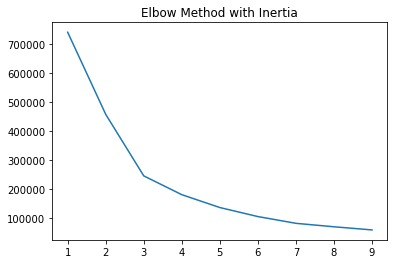

In [343]:
from sklearn import metrics
from scipy.spatial.distance import cdist

inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #average of squared distance from cluster center to the data points
    distortion = sum(np.min(cdist(X, model.cluster_centers_,
                                  'euclidean'),axis =1))/X.shape[0]
    
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)
    
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

In [344]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y = kmeans.fit_predict(X)

y

array([2, 2, 2, ..., 1, 1, 1])

C:\Users\weird\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


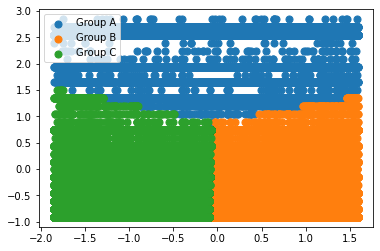

In [345]:
# I have obviously done something very wrong here. Leaving it in to look at later, but it doesn't seem right. 
#plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50,  label = 'Group A')
#plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, label = 'Group B')
#plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50,  label = 'Group C')

#plt.legend()
#plt.show()

5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

For this one I only went with part of the data. According to everyone in the study group this was crashing computers and aint nobody got time for that. Just from that alone we can tell that our puny machines aren't right for this method. 

I used the dendrogram to determine the number of clusters for this also looks like 3. 

In [349]:
hier_df = UK_df[:2000]
hier_df.shape

hier_df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID
0,536365,85123.0,6,2.55,17850.0
1,536365,71053.0,6,3.39,17850.0
2,536365,84406.0,8,2.75,17850.0
3,536365,84029.0,6,3.39,17850.0
4,536365,84029.0,6,3.39,17850.0
...,...,...,...,...,...
3348,536623,22030.0,12,0.42,15601.0
3349,536623,22027.0,12,0.42,15601.0
3350,536623,22983.0,24,0.42,15601.0
3351,536623,22718.0,24,0.42,15601.0


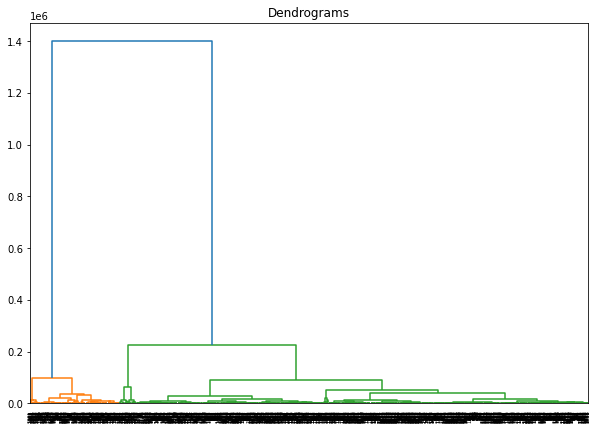

In [352]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(linkage(hier_df, method='ward'))


In [364]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(hier_df)
#hier_df['cluster'] = cluster.labels_


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

6.	Compare the results of 4 and 5. Which approach do you think is best? Why? 


Based on this dataset, I can't imagine why anyone would choose the hierarchical over the KMeans. It didn't run into memory issues, it looks cleaner. For me it feels much more intuitive than hierarchical. Hierarchical does have a neat graph when memory issues don't come into play. I guess doing both is generally a good approach to eliminate any doubt on your choice of number of clusters. 